In [1]:
from nuplan.common.maps.nuplan_map.map_factory import get_maps_api, get_maps_db

MAP_LOCATIONS = {"sg-one-north", "us-ma-boston", "us-nv-las-vegas-strip", "us-pa-pittsburgh-hazelwood"}

In [2]:
import geopandas as gpd


# Path to your .gpkg file
path_to_gpkg = "/home/daniel/nuplan/dataset/maps/us-pa-pittsburgh-hazelwood/9.17.1937/map.gpkg"

# List all available layers
layers = [
    "baseline_paths",
    "carpark_areas",
    "generic_drivable_areas",
    "dubins_nodes",
    "lane_connectors",
    "intersections",
    "boundaries",
    "crosswalks",
    "lanes_polygons",
    "lane_group_connectors",
    "lane_groups_polygons",
    "road_segments",
    "stop_polygons",
    "traffic_lights",
    "walkways",
    "gen_lane_connectors_scaled_width_polygons",
    "meta",
]

In [ ]:
import pandas as pd
gdf = gpd.read_file(path_to_gpkg, layer="gen_lane_connectors_scaled_width_polygons")
gdf

,light_face_type_fid,ori_mean_roll,ori_mean_pitch,ori_mean_yaw,ori_stddev_roll,ori_stddev_pitch,ori_stddev_yaw,pos_stddev_northing,pos_stddev_easting,pos_stddev_altitude,creator_id,geometry
0,1,0.0,0.0,2.185852,0.0,0.0,0.06,0.5,0.5,0.3,51d548ef-401c-4508-b11d-67457ee4956c,POINT Z (-79.95502 40.42725 5.4)
1,1,0.0,0.0,2.180372,0.0,0.0,0.06,0.5,0.5,0.3,0271b614-86f0-4257-b9a8-7efd6e5c7a7d,POINT Z (-79.95505 40.42724 5.4)
2,1,0.0,0.0,-0.907649,0.0,0.0,0.06,0.5,0.5,0.3,c160a0a0-17f8-44c6-93b2-8c823641ba37,POINT Z (-79.95523 40.42754 5.4)
3,1,0.0,0.0,-0.882493,0.0,0.0,0.06,0.5,0.5,0.3,257704f5-6631-4caf-8442-e22367a97e7f,POINT Z (-79.9552 40.42755 5.4)
4,1,0.0,0.0,-2.586727,0.0,0.0,0.06,0.5,0.5,0.3,f15e8c63-c2ee-4c51-9669-91870625020a,POINT Z (-79.95666 40.42889 5.4)
...,...,...,...,...,...,...,...,...,...,...,...,...
82,1,0.0,0.0,2.536060,0.0,0.0,0.06,0.5,0.5,0.3,363878ff-ae10-4519-b13c-2574ef191e60,POINT Z (-79.96699 40.42702 4.8)
83,1,0.0,0.0,-2.923759,0.0,0.0,0.06,0.5,0.5,0.3,eb1b59fa-d066-47dc-8496-7c8ef3cf32cb,POINT Z (-79.95044 40.41264 5.6)
84,1,0.0,0.0,-1.365026,0.0,0.0,0.06,0.5,0.5,0.3,e42e1606-9bc4-43be-a1f1-09f277cabe10,POINT Z (-79.95052 40.41272 5.6)
85,1,0.0,0.0,0.279317,0.0,0.0,0.06,0.5,0.5,0.3,5d092a44-e870-4c6b-8691-f3648e25dad1,POINT Z (-79.9506 40.41265 5.6)


In [81]:

lanes_polygons_df = gpd.read_file(path_to_gpkg, layer="lanes_polygons")

len(lanes_polygons_df.keys())

21

In [65]:
def mps_to_mph(mph: float) -> float:
    """
    Convert meters per second to miles per hour.
    :param mph: miles per hour [mi/h]
    :return: meters per second [m/s]
    """
    return mph / 0.44704
mps_to_mph(6.705409029950827)

14.99957281216631

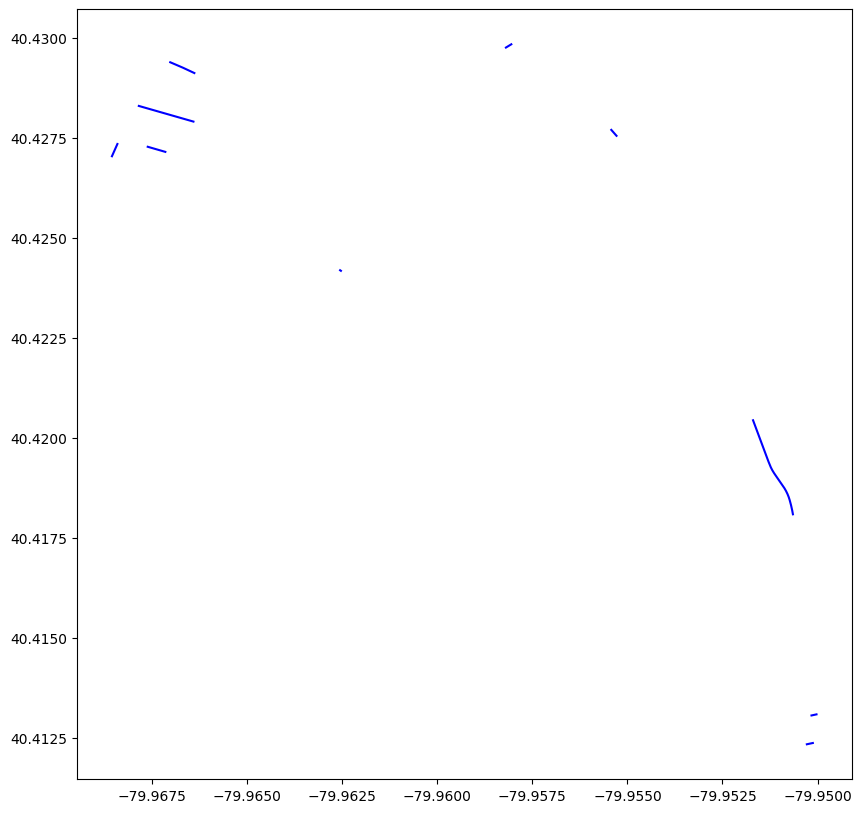

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fix, ax = plt.subplots(figsize=(10, 10))

type = 0

for i in np.random.choice(len(geoms[type]), 10):
    ax.plot(*geoms[type][i].coords.xy, color="blue")


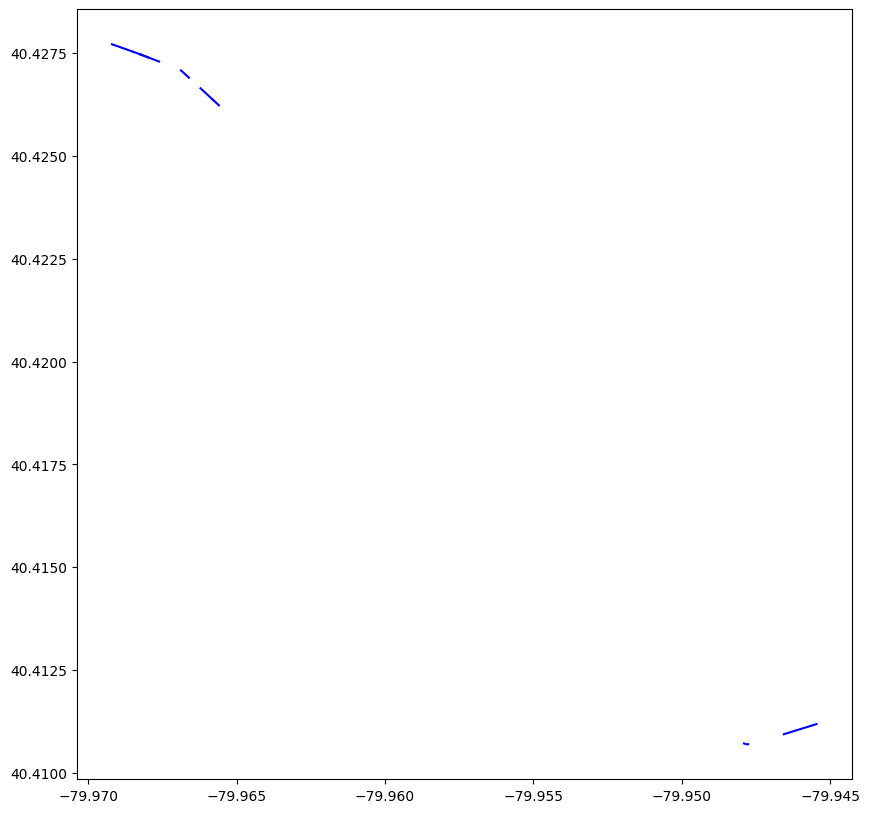

In [80]:
fix, ax = plt.subplots(figsize=(10, 10))

type = 3

for i in np.random.choice(len(geoms[type]), 10):
    ax.plot(*geoms[type][i].coords.xy, color="blue")


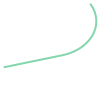

In [21]:
geoms[2][1]

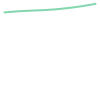

In [22]:
geoms[3][1]